In [1]:
import numpy as np
import pandas as pd

In [2]:
path = "C:/Users/User/Desktop/AI/10. Artificial Intelligence/4. 4rth semester/Advanced ML/project/datasets/DeliciousMIL/Data/train-data.dat"

In [3]:
labels = []

for item in open("C:/Users/User/Desktop/AI/10. Artificial Intelligence/4. 4rth semester/Advanced ML/project/datasets/DeliciousMIL/Data/labels.txt").readlines():
    item = item.replace('\n', '')
    label_name, _ = item.split(', ')
    labels.append(label_name)

In [4]:
labels

['programming',
 'style',
 'reference',
 'java',
 'web',
 'internet',
 'culture',
 'design',
 'education',
 'language',
 'books',
 'writing',
 'computer',
 'english',
 'politics',
 'history',
 'philosophy',
 'science',
 'religion',
 'grammar']

In [5]:
from sklearn.feature_extraction.text import TfidfTransformer

# path = "./Data"
def read_train(path):
    with open(path) as f:
        line = f.readline()
        docs = []
        docs_bin = []
        while line:
            line = line.rstrip('\n').split()
            L = []
            for i in line:
                try:
                    L.append(int(i))
                except:
                    continue
            docs.append(np.array(L))

            words_bin = np.zeros(8520)
            for i in L:
                words_bin[i] += 1

            docs_bin.append(words_bin)
            line = f.readline()
        docs = np.array(docs)
        docs_bin = np.array(docs_bin)
    return docs_bin, docs

# normalize
def tfIdf(docs_bin):
    tf_transformer = TfidfTransformer(use_idf=False).fit(docs_bin)
    X_train_tf = tf_transformer.transform(docs_bin)
    return X_train_tf

In [6]:
X_train1,train = read_train(path)
X_train = tfIdf(X_train1)

In [8]:
print(X_train.shape)

(8251, 8520)


In [9]:
path2 = "C:/Users/User/Desktop/AI/10. Artificial Intelligence/4. 4rth semester/Advanced ML/project/datasets/DeliciousMIL/Data/test-data.dat"

In [10]:
X_test1, test = read_train(path2)
X_test = tfIdf(X_test1)

In [12]:
y_train = np.loadtxt("C:/Users/User/Desktop/AI/10. Artificial Intelligence/4. 4rth semester/Advanced ML/project/datasets/DeliciousMIL/Data/train-label.dat")
y_test =  np.loadtxt("C:/Users/User/Desktop/AI/10. Artificial Intelligence/4. 4rth semester/Advanced ML/project/datasets/DeliciousMIL/Data/test-label.dat")

In [51]:
print("X_train shape: ",X_train.shape)
print("y_train shape: ",y_train.shape)
print("X_test shape: ",X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (8251, 8520)
y_train shape:  (8251, 20)
X_test shape:  (3983, 8520)
y_test shape:  (3983, 20)


 #  Train 

In [16]:
# using Label Powerset
# train the TFId X_train

import time
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

parameters = [
    {
        'classifier': [MultinomialNB()],
        'classifier__alpha': [0.7 , 0.8, 1.0],
    },
    {
        'classifier': [RandomForestClassifier()],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__n_estimators': [10, 20, 50],
    },
    {'classifier': [SVC()], 
    'classifier__kernel': ['rbf', 'linear', 'poly'],
    'classifier__C':[0.01, 0.1, 0.5,1]
    },
    {'classifier':[KNeighborsClassifier()],
    'classifier__n_neighbors':[3,5,10,30, 60]}
]

state=[]
for param in parameters:
    start = time.time()
    clf = GridSearchCV(LabelPowerset(require_dense=[False, True]), param, scoring='accuracy')
    clf.fit(X_train,y_train)
    predictions = clf.predict(X_test)
    print(clf.best_params_, clf.best_score_)
    print("time: ",  time.time() - start)
    ham_loss = metrics.hamming_loss(y_test, predictions)
    acc = metrics.accuracy_score(y_test, predictions)
    f1_mic= metrics.f1_score(y_test, predictions, average='micro')
    f1_mac =  metrics.f1_score(y_test, predictions, average='macro')
    jac_mic = metrics.jaccard_score(y_test, predictions, average='micro')
    jac_mac = metrics.jaccard_score(y_test, predictions, average='macro')
    conf_matr = metrics.multilabel_confusion_matrix(y_test, predictions)
     
    state.append([param,clf.best_params_, clf.best_score_,ham_loss, acc, f1_mic, f1_mac, jac_mic, jac_mac, conf_matr])

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'classifier': MultinomialNB(alpha=0.7, class_prior=None, fit_prior=True), 'classifier__alpha': 0.7} 0.05926554357047631
time:  23.474191904067993


C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'classifier': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), 'classifier__criterion': 'gini', 'classifier__n_estimators': 50} 0.07162768149315235
time:  979.4421470165253


C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 

{'classifier': SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False), 'classifier__C': 1, 'classifier__kernel': 'linear'} 0.08762574233426251
time:  7292.401781320572


C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'classifier': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=60, p=2,
                     weights='uniform'), 'classifier__n_neighbors': 60} 0.07780875045449036
time:  33.584190130233765


In [17]:
def results(state):
    results=[]
    for states in state:
        cl = states[0]['classifier']
        print("Classifier: %s " %cl)
        print("Confusion matrices per label \n")
        
        for i in range(len(labels)):
            print("Label: ", labels[i])
            print(states[-1][i])
            acc = round((states[-1][i][0][0]+states[-1][i][1][1])/(states[-1][i][0][0]+states[-1][i][0][1]+states[-1][i][1][0]+states[-1][i][1][1]),3)
            print("Accuracy: %s " %acc)
            pre = round(states[-1][i][0][0]/(states[-1][i][0][0]+states[-1][i][0][1]), 3)
            rec = round(states[-1][i][0][0]/(states[-1][i][0][0]+states[-1][i][1][0]), 3)
            F1_measure = (2*pre*rec)/(pre+rec)
            print("Precision: %s" % pre) #TP/tp+fp
            print("Recall: %s" % rec) #tp/tp+fn
            print("F1_score: %s \n" %F1_measure)
            results.append([cl, labels[i], acc, pre, rec, F1_measure])
    return results

In [18]:
# acquire the results [confusion matrix, accuracy, precisioni, recall, f1]
result = results(state)

Classifier: [MultinomialNB(alpha=0.7, class_prior=None, fit_prior=True)] 
Confusion matrices per label 

Label:  programming
[[3006    0]
 [ 975    2]]
Accuracy: 0.755 
Precision: 1.0
Recall: 0.755
F1_score: 0.8603988603988605 

Label:  style
[[3755    0]
 [ 228    0]]
Accuracy: 0.943 
Precision: 1.0
Recall: 0.943
F1_score: 0.970663921770458 

Label:  reference
[[2425    0]
 [1558    0]]
Accuracy: 0.609 
Precision: 1.0
Recall: 0.609
F1_score: 0.7569919204474829 

Label:  java
[[3611    0]
 [ 370    2]]
Accuracy: 0.907 
Precision: 1.0
Recall: 0.907
F1_score: 0.951232302045097 

Label:  web
[[2933    0]
 [1050    0]]
Accuracy: 0.736 
Precision: 1.0
Recall: 0.736
F1_score: 0.847926267281106 

Label:  internet
[[3446    0]
 [ 537    0]]
Accuracy: 0.865 
Precision: 1.0
Recall: 0.865
F1_score: 0.9276139410187667 

Label:  culture
[[3281    0]
 [ 702    0]]
Accuracy: 0.824 
Precision: 1.0
Recall: 0.824
F1_score: 0.9035087719298246 

Label:  design
[[2904    0]
 [1079    0]]
Accuracy: 0.729 
P

In [48]:
import matplotlib.pyplot as plt

# plot labels per classifier
def plot_per_classifier(results):
    for j in [0, 20,40,60]:

        plt.figure(figsize=[20,20])
        plt.title("Classifier: "+str(results[j][0]))
        for i in range(len(labels)):
            plt.bar(results[i+j][1],results[i+j][5])
        plt.show()
    
# return the name of the classifier
def print_estimator_name(estimator):
    return estimator.__class__.__name__

# plot classifier per label
def plot_per_label(result):
    for i in range(len(labels)):

        plt.figure(figsize=[8,5])
        plt.title("Label: "+str(labels[i]))

        for j in [0, 20,40,60]:
            plt.bar(str(print_estimator_name(result[i+j][0][0])), result[i+j][5], label=str(print_estimator_name(result[i+j][0][0])))
        plt.show()


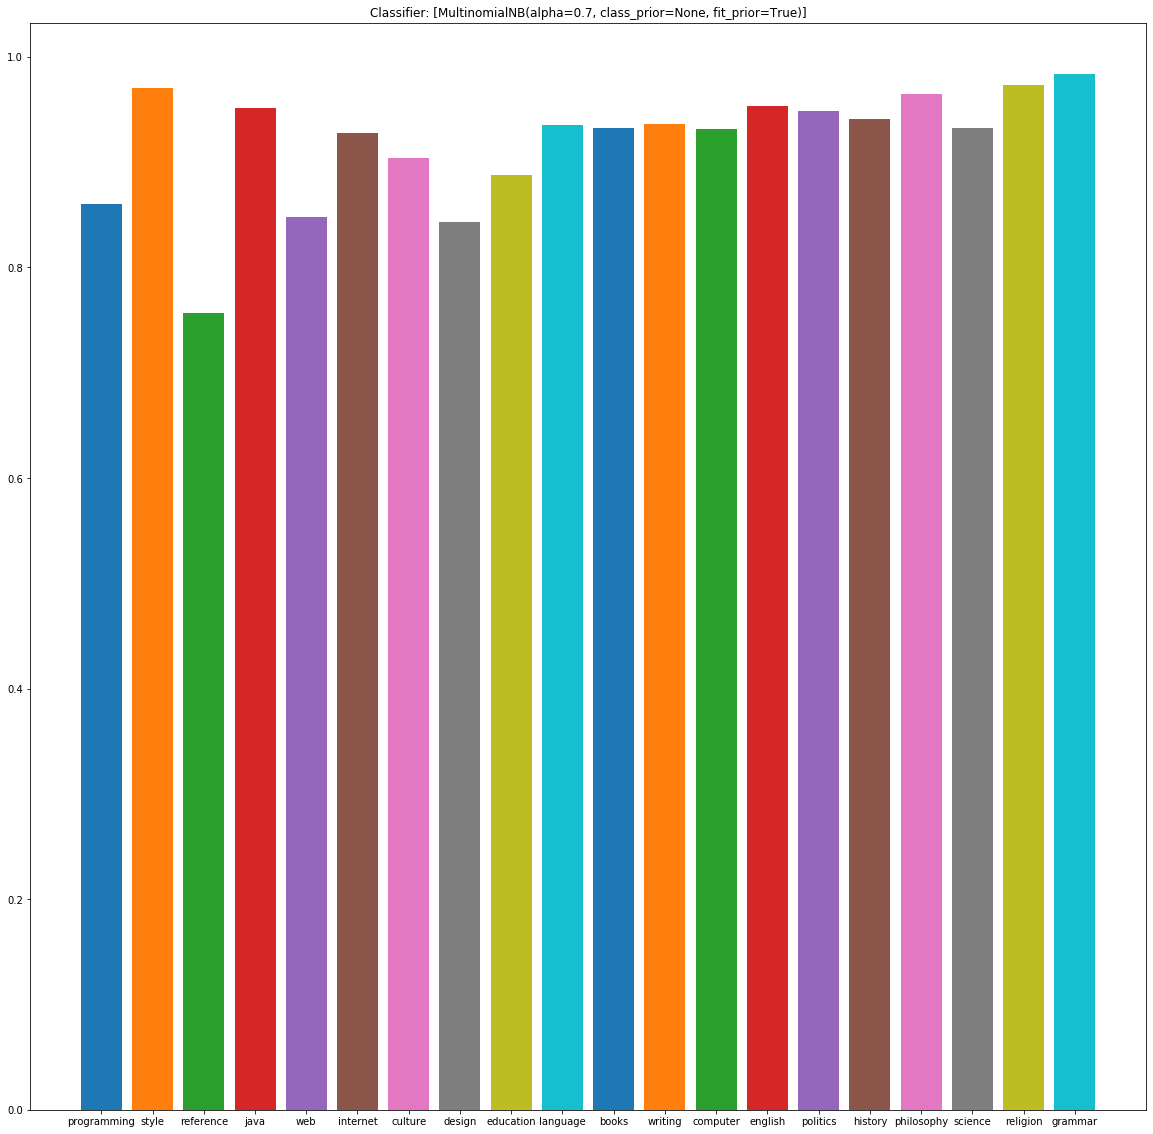

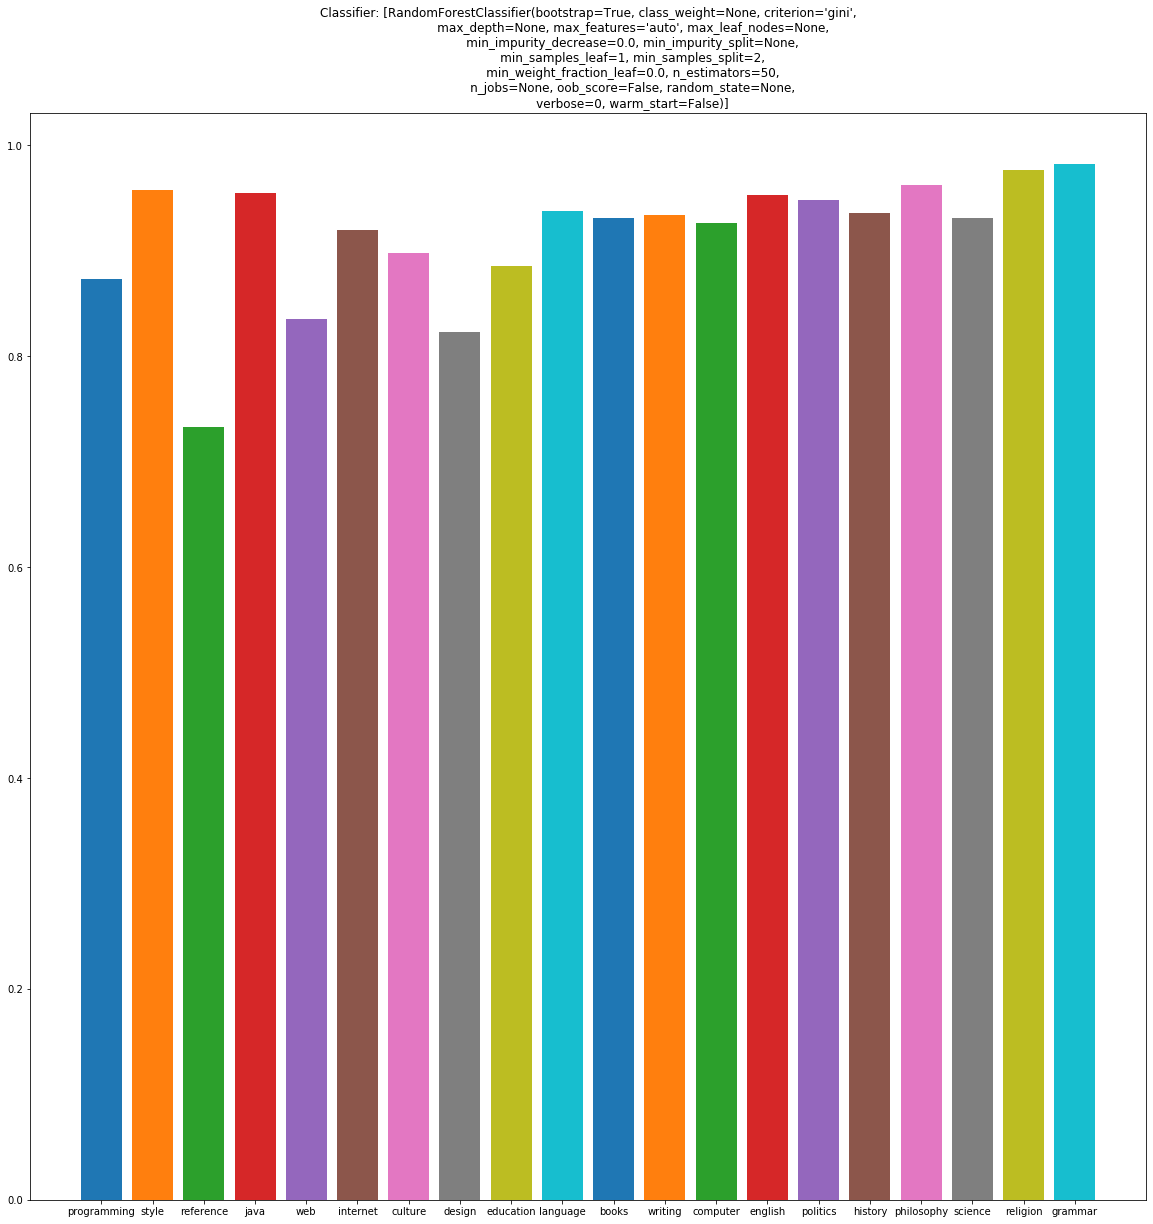

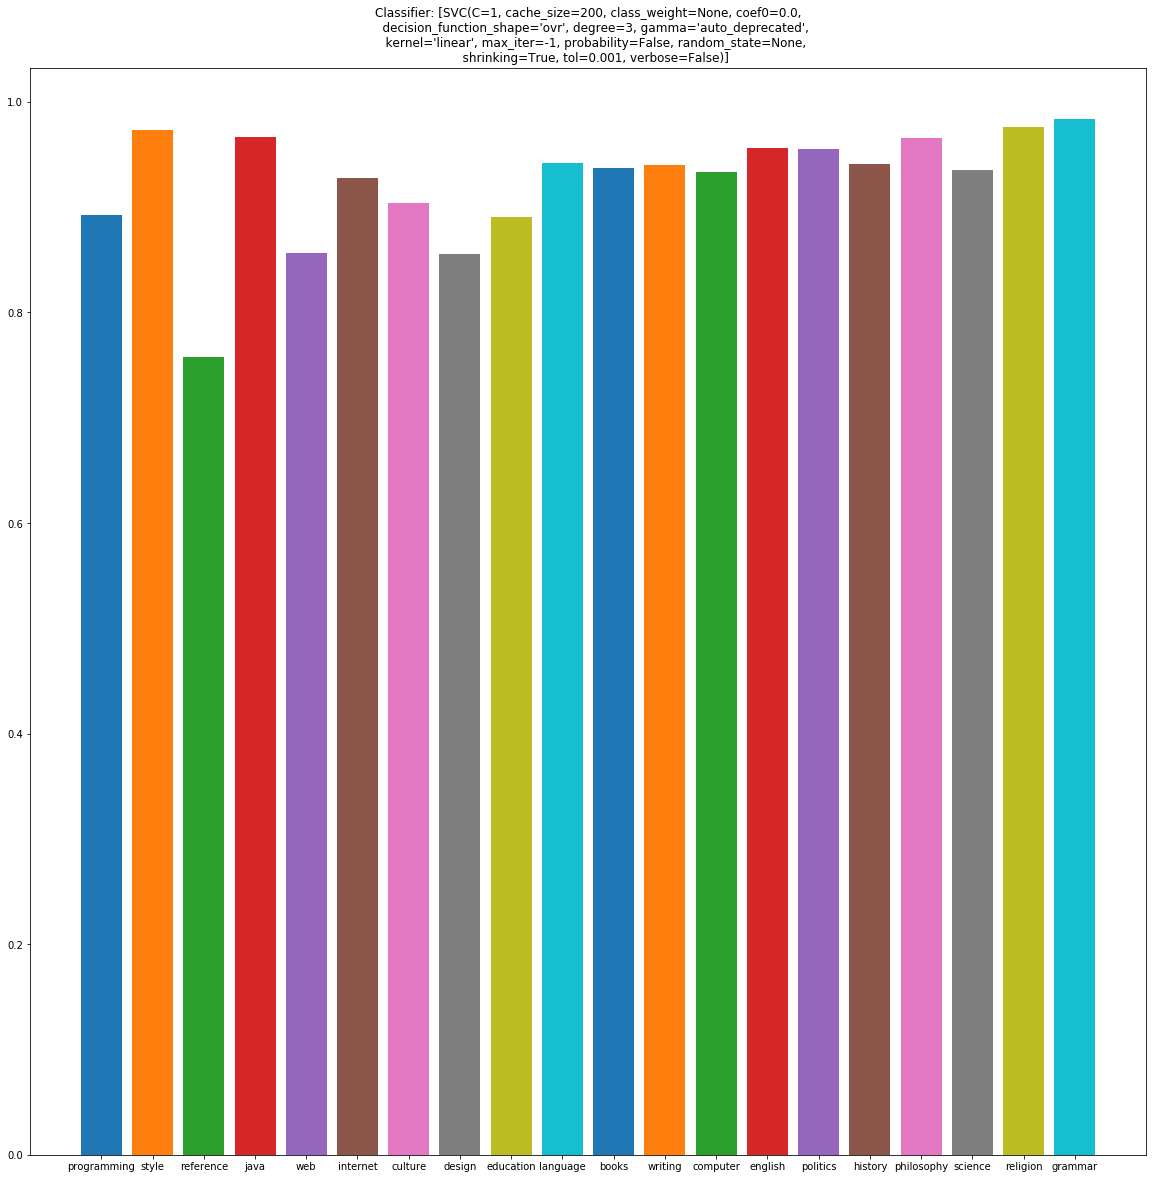

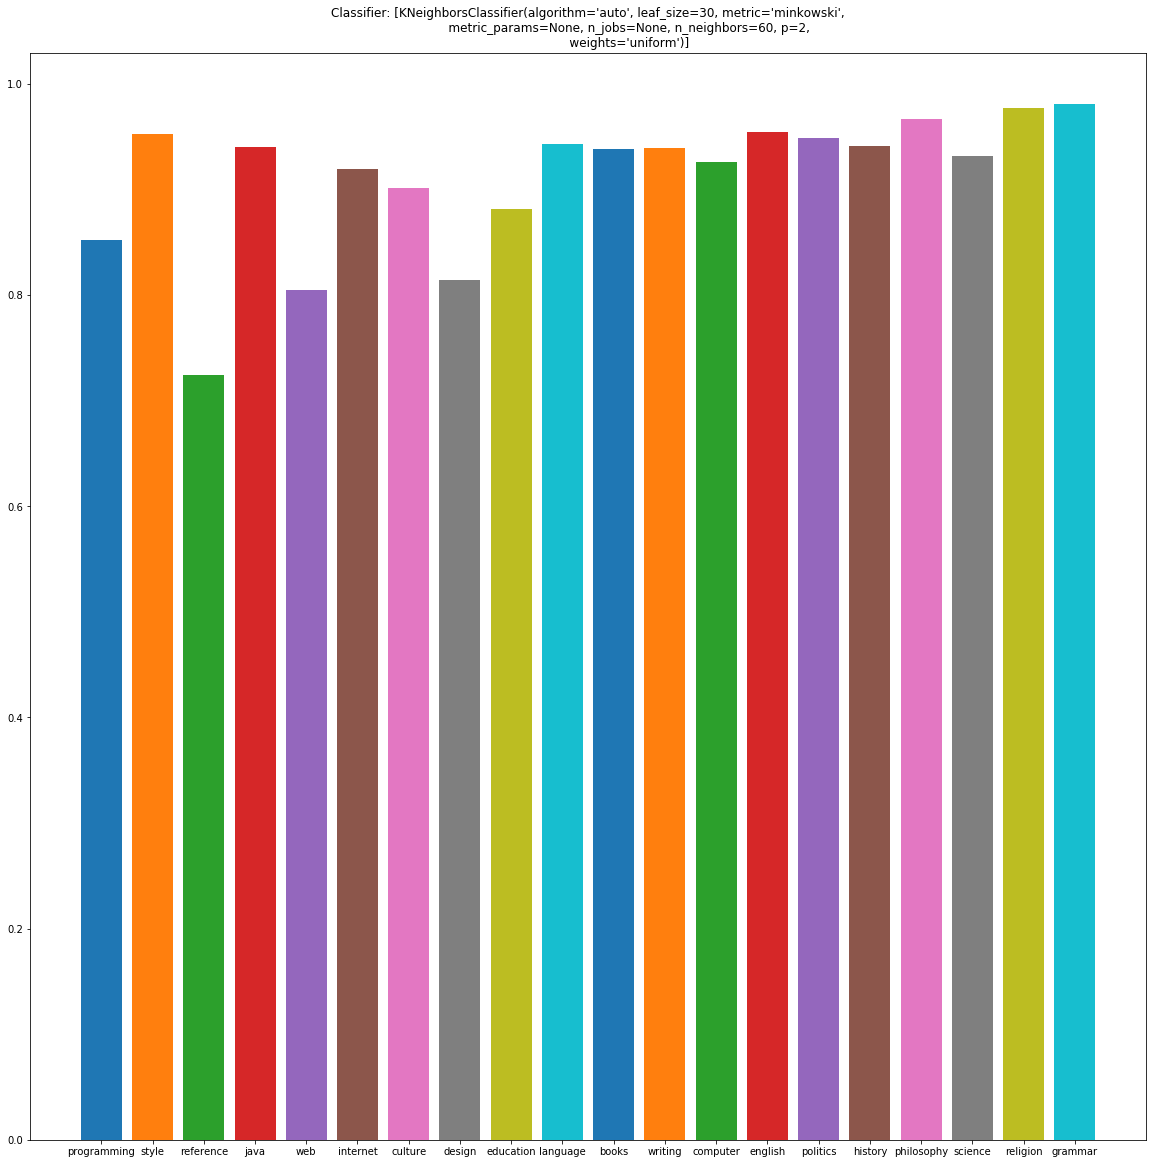

In [22]:
plot_per_classifier(result)

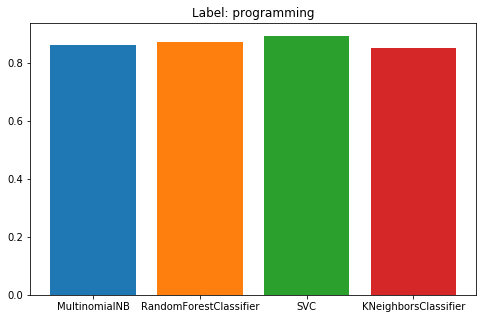

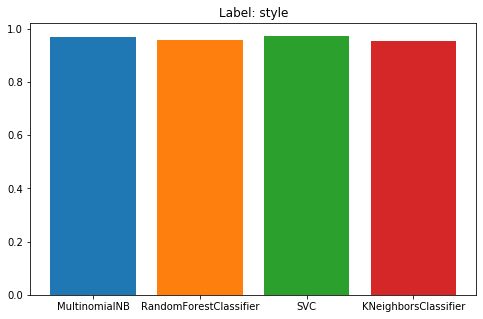

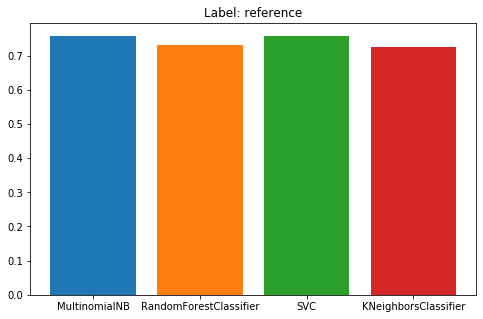

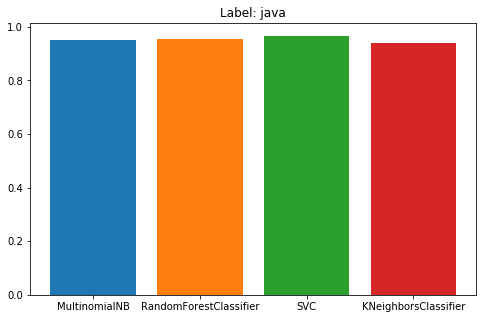

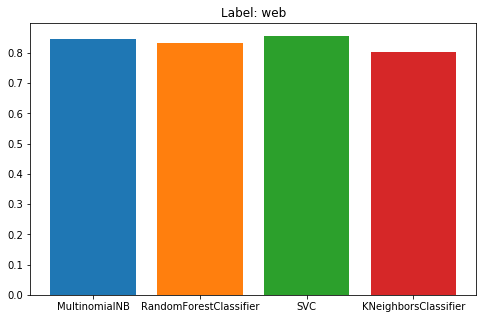

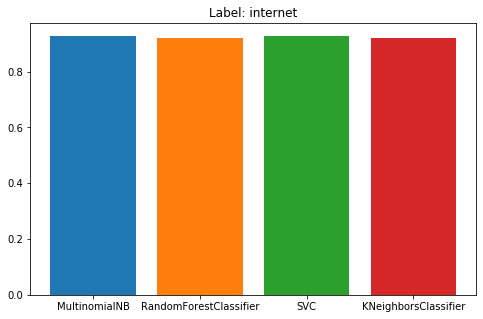

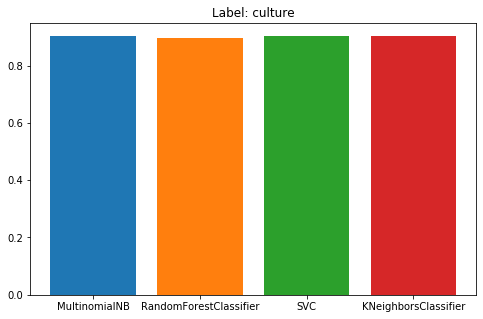

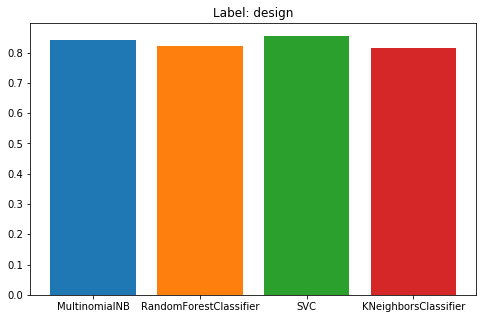

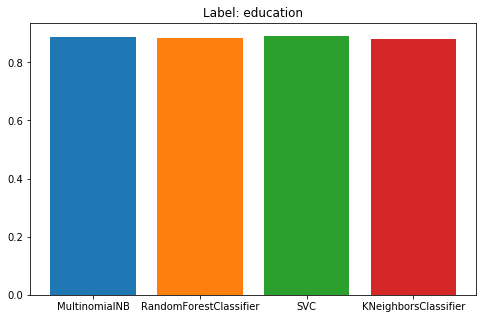

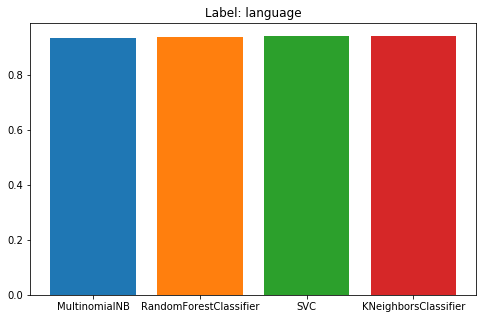

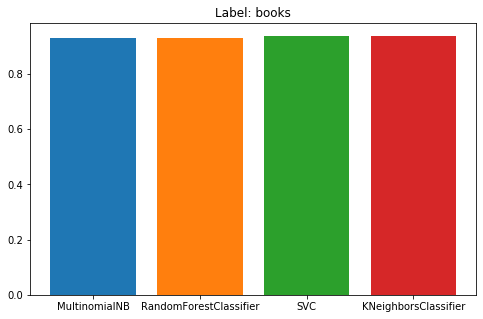

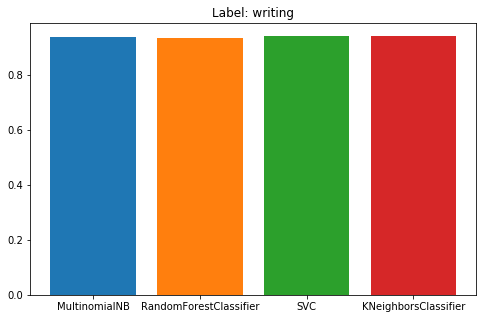

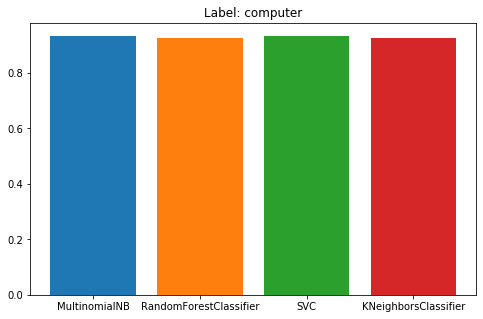

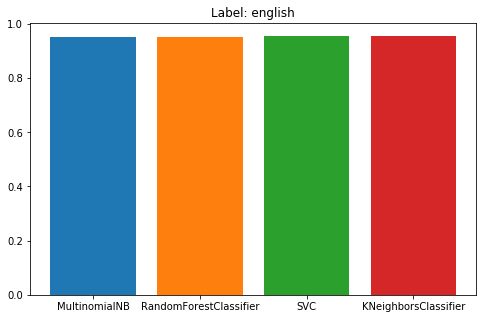

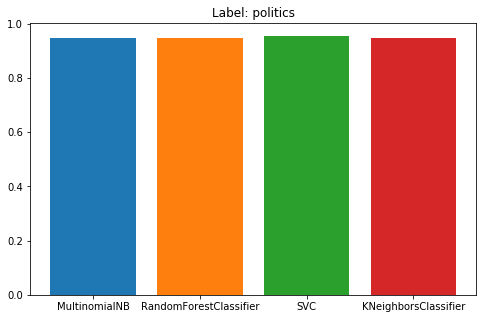

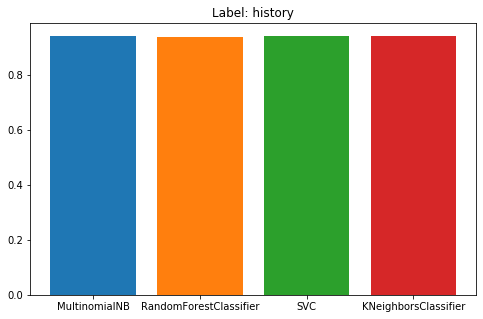

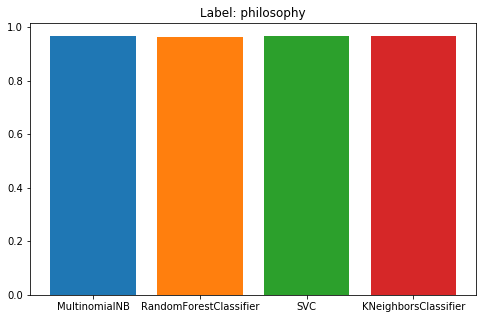

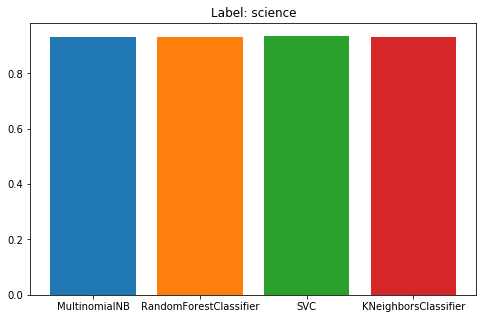

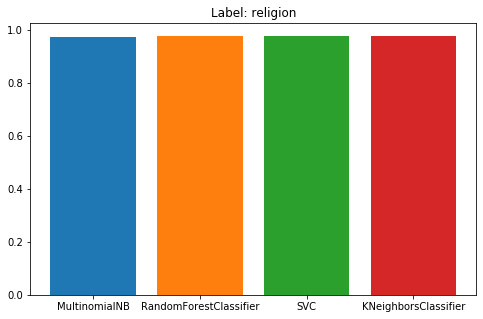

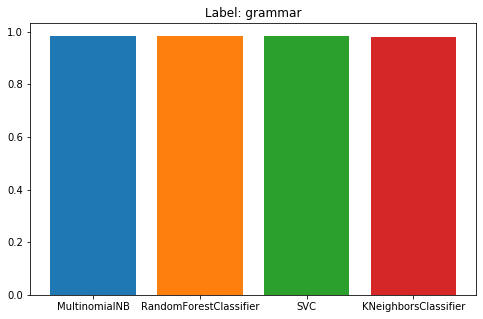

In [49]:
plot_per_label(result)